In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import squarify
%matplotlib inline

style.use('seaborn')

In [23]:
codebook=pd.read_csv('HackerRank-Developer-Survey-2018-Codebook.csv')
numeric_mapping=pd.read_csv('HackerRank-Developer-Survey-2018-Numeric-Mapping.csv')
numeric=pd.read_csv('HackerRank-Developer-Survey-2018-Numeric.csv', na_values=['#NULL!', 'nan'])
values=pd.read_csv('HackerRank-Developer-Survey-2018-Values.csv', na_values=['#NULL!', 'nan'])

C:\Users\rijhwani\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (10,19,138) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\rijhwani\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3,10,19,137,138) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
codebook.head()

,Data Field,Survey Question,Notes
0,RespondentID,NaN,Respondent ID
1,StartDate,NaN,When did they start (date and time)
2,EndDate,NaN,When did they end (date and time)
3,CountryNumeric2,NaN,see Country-Code-Mapping.csv
4,q1AgeBeginCoding,At what age did you start coding,NaN


In [25]:
numeric_mapping.head()

,Data Field,Value,Label
0,q1AgeBeginCoding,1,5 - 10 years old
1,q1AgeBeginCoding,2,11 - 15 years old
2,q1AgeBeginCoding,3,16 - 20 years old
3,q1AgeBeginCoding,4,21 - 25 years old
4,q1AgeBeginCoding,5,26 - 30 years old


In [26]:
numeric.head()

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
0,6464453728,10/19/17 11:51,10/20/17 12:05,148.0,3.0,3.0,2.0,3.0,NaN,1.0,...,1,datacamp,1,1.0,NaN,2.0,NaN,NaN,NaN,2.0
1,6478031510,10/26/17 6:18,10/26/17 7:49,164.0,3.0,4.0,1.0,7.0,NaN,2.0,...,0,NaN,1,1.0,NaN,2.0,NaN,NaN,NaN,2.0
2,6464392829,10/19/17 10:44,10/19/17 10:56,98.0,2.0,2.0,2.0,3.0,NaN,2.0,...,0,NaN,1,1.0,NaN,2.0,NaN,NaN,NaN,2.0
3,6481629912,10/27/17 1:51,10/27/17 2:05,43.0,2.0,2.0,1.0,5.0,NaN,1.0,...,0,NaN,1,1.0,NaN,2.0,NaN,NaN,NaN,3.0
4,6488385057,10/31/17 11:46,10/31/17 11:59,NaN,3.0,4.0,2.0,5.0,NaN,0.0,...,1,Blogs/articles by industry leaders,1,1.0,NaN,2.0,NaN,NaN,NaN,3.0


In [27]:
values.head()

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
0,6464453728,10/19/17 11:51,10/20/17 12:05,South Korea,16 - 20 years old,18 - 24 years old,Female,Some college,NaN,Computer Science,...,Other (please specify),datacamp,num%2 == 0,Yes,NaN,No,NaN,NaN,NaN,Queue
1,6478031510,10/26/17 6:18,10/26/17 7:49,Ukraine,16 - 20 years old,25 - 34 years old,Male,"Post graduate degree (Masters, PhD)",NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,NaN,NaN,Queue
2,6464392829,10/19/17 10:44,10/19/17 10:56,Malaysia,11 - 15 years old,12 - 18 years old,Female,Some college,NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,NaN,NaN,Queue
3,6481629912,10/27/17 1:51,10/27/17 2:05,Curaçao,11 - 15 years old,12 - 18 years old,Male,College graduate,NaN,Computer Science,...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,NaN,NaN,Hashmap
4,6488385057,10/31/17 11:46,10/31/17 11:59,NaN,16 - 20 years old,25 - 34 years old,Female,College graduate,NaN,NaN,...,Other (please specify),Blogs/articles by industry leaders,num%2 == 0,Yes,NaN,No,NaN,NaN,NaN,Hashmap


In [28]:
codebook.columns=['FieldName','Question','Notes']
codebook.set_index('FieldName',inplace=True)
numeric_mapping.set_index('Data Field',inplace=True)

In [29]:
numeric_mapping.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, q1AgeBeginCoding to q36Level4
Data columns (total 2 columns):
Value    452 non-null int64
Label    452 non-null object
dtypes: int64(1), object(1)
memory usage: 10.6+ KB


In [30]:
numeric_mapping=numeric_mapping.Value.astype('float')

In [31]:
numeric.q1AgeBeginCoding.describe()

count    25060.000000
mean         2.953911
std          0.872670
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: q1AgeBeginCoding, dtype: float64

In [32]:
numeric.isnull().sum()

RespondentID                       0
StartDate                          0
EndDate                            0
CountryNumeric2                 3991
q1AgeBeginCoding                  30
q2Age                             41
q3Gender                          69
q4Education                      305
q0004_other                    24630
q5DegreeFocus                    162
q0005_other                    23375
q6LearnCodeUni                     0
q6LearnCodeSelfTaught              0
q6LearnCodeAccelTrain              0
q6LearnCodeDontKnowHowToYet        0
q6LearnCodeOther                   0
q0006_other                    24601
q7Level1                           0
q8JobLevel                         0
q0008_other                    24133
q8Student                          0
q9CurrentRole                     35
q0009_other                    24046
q10Industry                      674
q0010_other                    21578
q12JobCritPrefTechStack            0
q12JobCritCompMission              0
q

In [33]:
values.fillna('Not Given')
numeric=numeric.fillna(-1)

In [34]:
tot_columns=values.columns.ravel()
tot_columns

array(['RespondentID', 'StartDate', 'EndDate', 'CountryNumeric2',
       'q1AgeBeginCoding', 'q2Age', 'q3Gender', 'q4Education',
       'q0004_other', 'q5DegreeFocus', 'q0005_other', 'q6LearnCodeUni',
       'q6LearnCodeSelfTaught', 'q6LearnCodeAccelTrain',
       'q6LearnCodeDontKnowHowToYet', 'q6LearnCodeOther', 'q0006_other',
       'q7Level1', 'q8JobLevel', 'q0008_other', 'q8Student',
       'q9CurrentRole', 'q0009_other', 'q10Industry', 'q0010_other',
       'q12JobCritPrefTechStack', 'q12JobCritCompMission',
       'q12JobCritCompCulture', 'q12JobCritWorkLifeBal',
       'q12JobCritCompensation', 'q12JobCritProximity', 'q12JobCritPerks',
       'q12JobCritSmartPeopleTeam', 'q12JobCritImpactwithProduct',
       'q12JobCritInterestProblems', 'q12JobCritFundingandValuation',
       'q12JobCritStability', 'q12JobCritProfGrowth', 'q12JobCritOther',
       'q0012_other', 'q13EmpMeasWhiteboard', 'q13EmpMeasHackerRank',
       'q13EmpMeasOtherCodingChallenge', 'q13EmpMeasTechPhoneInt',
 

In [35]:
'CountryNumeric2' in tot_columns

True

Text(0.5,1,'Top 10 Countries')

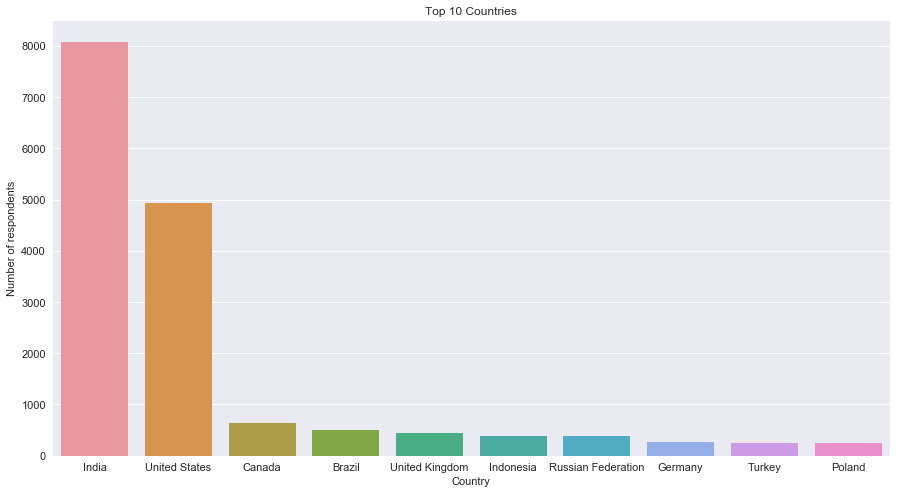

In [36]:
top_countries=values['CountryNumeric2'].value_counts().head(10)
plt.figure(figsize=(15,8))
plt.tick_params(labelsize=11)
sns.barplot(x=top_countries.index,y=top_countries.values)
plt.xlabel("Country")
plt.ylabel("Number of respondents")
plt.title("Top 10 Countries")

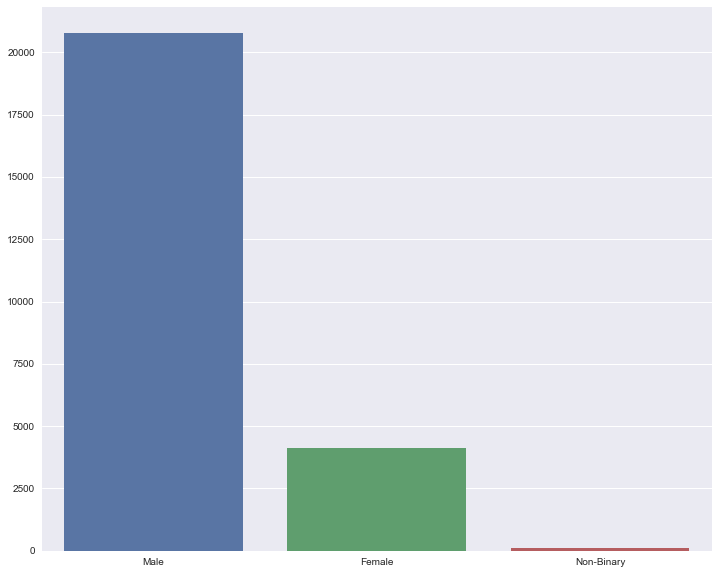

In [37]:
gender=values.q3Gender.value_counts()
plt.figure(figsize=(12,10))
sns.barplot(gender.index,gender.values)

Woah, we need more female developers I guess

Text(0,0.5,'Education')

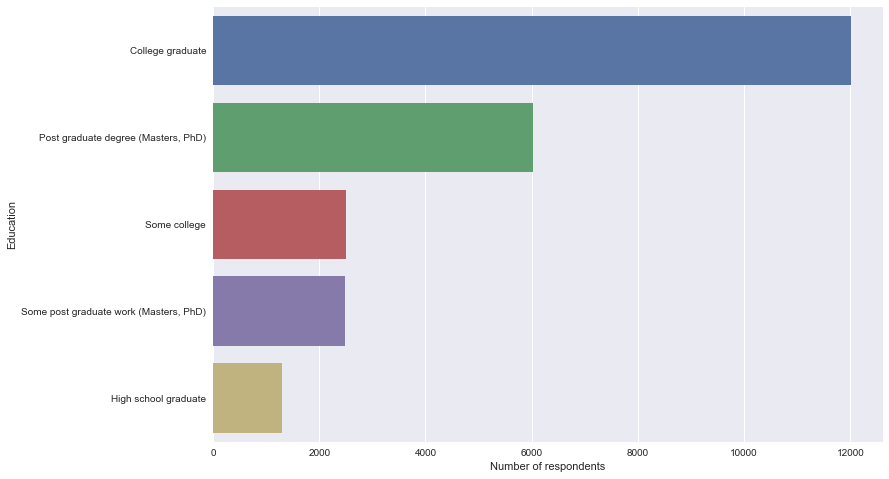

In [38]:
highest_education = values['q4Education'].value_counts().head()
plt.figure(figsize=(12,8))
sns.barplot(highest_education.values,highest_education.index)
plt.xlabel("Number of respondents")
plt.ylabel("Education")

In [46]:
cols=values.columns[values.columns.str.startswith('q25')]
cols

Index(['q25LangC', 'q25LangCPlusPlus', 'q25LangJava', 'q25LangPython',
       'q25LangRuby', 'q25LangJavascript', 'q25LangCSharp', 'q25LangGo',
       'q25Scala', 'q25LangPerl', 'q25LangSwift', 'q25LangPascal',
       'q25LangClojure', 'q25LangPHP', 'q25LangHaskell', 'q25LangLua',
       'q25LangR', 'q25LangRust', 'q25LangTypescript', 'q25LangKotlin',
       'q25LangJulia', 'q25LangErlang', 'q25LangOcaml'],
      dtype='object')

In [40]:
values.drop(['q25LangOther'],axis=1,inplace=True)

In [47]:
l=[]
lang=[]
for i in cols:
    l.append(values[values[i] == 'Know'].shape[0])
    x=i.replace('q25','')
    x=x.replace('Lang','')
    lang.append(x)
lang

['C',
 'CPlusPlus',
 'Java',
 'Python',
 'Ruby',
 'Javascript',
 'CSharp',
 'Go',
 'Scala',
 'Perl',
 'Swift',
 'Pascal',
 'Clojure',
 'PHP',
 'Haskell',
 'Lua',
 'R',
 'Rust',
 'Typescript',
 'Kotlin',
 'Julia',
 'Erlang',
 'Ocaml']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

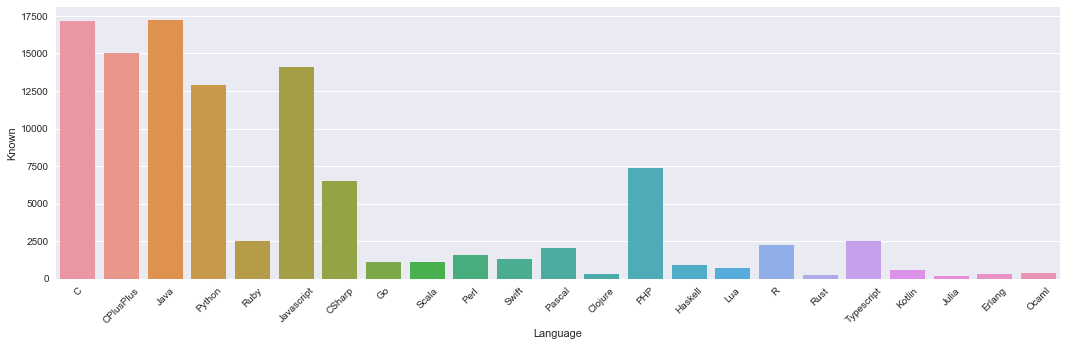

In [48]:
plt.figure(figsize=(18,5))
sns.barplot(lang,l)
plt.xlabel('Language')
plt.ylabel('Known')
plt.xticks(rotation=45)

## Why in the f is Java so popular, it SUXX

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

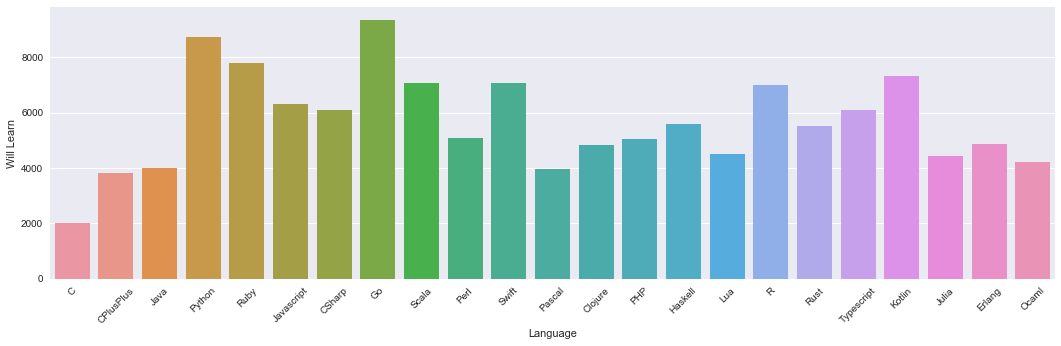

In [49]:
l=[]
lang=[]
for i in cols:
    l.append(values[values[i] == 'Will Learn'].shape[0])
    x=i.replace('q25','')
    x=x.replace('Lang','')
    lang.append(x)
    
plt.figure(figsize=(18,5))
sns.barplot(lang,l)
plt.xlabel('Language')
plt.ylabel('Will Learn')
plt.xticks(rotation=45)

## Aint nobody got time for C

In [53]:
codebook.describe()

,Question,Notes
count,247,100
unique,75,14
top,Which of these core competencies do you look f...,shown if q16HiringManager == Yes
freq,29,85


In [55]:
numeric.describe(include=["O"])

,StartDate,EndDate,q0004_other,q0005_other,q0006_other,q0008_other,q0009_other,q0010_other,q0012_other,q0013_other,...,q0023_other,q0024_other,q25LangOther,q0026_other,q0027_other,q28LoveOther,q0029_other,q0030_other,q0032_other,q0035_other
count,25090,25090,25090,25090,25090,25090,25090,25090,25090,25090,...,25090,25090,25090,25090,25090,25090,25090,25090,25090,25090
unique,6885,6948,355,932,385,664,828,1602,257,1354,...,622,1292,603,799,671,328,551,826,335,201
top,10/26/17 12:41,10/26/17 12:59,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
freq,44,36,24630,23375,24601,24133,24046,21578,24773,23241,...,24021,20816,24011,23906,24174,24719,24423,23867,24708,24881


In [56]:
values.describe(include=["O"])

,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,q0005_other,...,q30LearnCodeAcademicPaper,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34IdealLengHackerRankTest,q0035_other,q36Level4
count,25090,25090,21099,25060,25049,25021,24785,460,23769,1715,...,5561,1224,1223,25090,24597,382,24904,9925,209,24927
unique,6885,6948,152,9,9,3,7,354,2,931,...,1,1,825,4,2,334,2,4,200,3
top,10/26/17 12:41,10/26/17 12:59,India,16 - 20 years old,18 - 24 years old,Male,College graduate,Bachelor,Computer Science,Economics,...,Academic papers,Other (please specify),Leetcode,num%2 == 0,Yes,Maybe,No,46 - 60 minutes,20-30 min,Queue
freq,44,36,8088,14293,12589,20774,12010,18,17972,58,...,5561,1224,33,24539,23959,14,14935,3575,3,19808


In [75]:
tot=codebook.isnull().sum().sort_values(ascending=False)
per=(codebook.isnull().sum())/(codebook.isnull().count())*100
miss_codebook=pd.concat([tot,per],axis=1,keys=['Total','Percent'])
miss_codebook

,Total,Percent
Notes,151,60.159363
Question,4,1.593625


In [86]:
values.head()

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
0,6464453728,10/19/17 11:51,10/20/17 12:05,South Korea,16 - 20 years old,18 - 24 years old,Female,Some college,NaN,Computer Science,...,Other (please specify),datacamp,num%2 == 0,Yes,NaN,No,NaN,NaN,NaN,Queue
1,6478031510,10/26/17 6:18,10/26/17 7:49,Ukraine,16 - 20 years old,25 - 34 years old,Male,"Post graduate degree (Masters, PhD)",NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,NaN,NaN,Queue
2,6464392829,10/19/17 10:44,10/19/17 10:56,Malaysia,11 - 15 years old,12 - 18 years old,Female,Some college,NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,NaN,NaN,Queue
3,6481629912,10/27/17 1:51,10/27/17 2:05,Curaçao,11 - 15 years old,12 - 18 years old,Male,College graduate,NaN,Computer Science,...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,NaN,NaN,Hashmap
4,6488385057,10/31/17 11:46,10/31/17 11:59,NaN,16 - 20 years old,25 - 34 years old,Female,College graduate,NaN,NaN,...,Other (please specify),Blogs/articles by industry leaders,num%2 == 0,Yes,NaN,No,NaN,NaN,NaN,Hashmap


In [93]:
total = values.isnull().sum().sort_values(ascending = False)
percent = (values.isnull().sum()/values.isnull().count()*100).sort_values(ascending = False)
missing_values_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_values_data.tail(40)

,Total,Percent
q26FrameLearnNodeDotjs,10815,43.104823
q30LearnCodeBooks,9988,39.808689
q26FrameLearnAngularJS,9985,39.796732
q13EmpMeasResume,9918,39.529693
q28LoveJavascript,9595,38.242328
q28LoveCPlusPlus,8643,34.447987
q28LoveC,8212,32.730171
q30LearnCodeYoutube,8129,32.399362
q28LovePython,7735,30.829016
q6LearnCodeUni,7658,30.522120


In [90]:
values.shape

(25090, 250)

In [113]:
values.drop(missing_values_data[missing_values_data['Percent']>=80].index.values,axis=1,inplace=True)

# DROP IT LIKES IT HOT 

In [116]:
len(values.columns.values)

108

In [121]:
df_india=values[values['CountryNumeric2']=="India"]

In [129]:
no_of_indians=values.shape[0]-df_india.shape[0]
no_of_indians

17002

# 8088 Indians participated in the survey

In [136]:
df_india.CountryNumeric2.value_counts()

India    8088
Name: CountryNumeric2, dtype: int64

In [147]:
df_india.columns[df_india.columns.str.startswith('q12')].values

array(['q12JobCritPrefTechStack', 'q12JobCritCompCulture',
       'q12JobCritWorkLifeBal', 'q12JobCritCompensation',
       'q12JobCritSmartPeopleTeam', 'q12JobCritInterestProblems',
       'q12JobCritProfGrowth'], dtype=object)

In [148]:
df_india_jobs=df_india[df_india.columns[df_india.columns.str.startswith('q12')].values]

In [150]:
df_india_jobs.head()

,q12JobCritPrefTechStack,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritSmartPeopleTeam,q12JobCritInterestProblems,q12JobCritProfGrowth
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,Preferred tech stack,NaN,NaN,NaN,NaN,NaN,Professional growth and learning
31,NaN,NaN,NaN,Compensation,NaN,NaN,Professional growth and learning
35,Preferred tech stack,Company culture,Good work/life balance,NaN,Smart people / team,Interesting problems to solve,Professional growth and learning
37,NaN,NaN,Good work/life balance,NaN,NaN,Interesting problems to solve,NaN


In [153]:
df_india_jobs.isnull().sum()

q12JobCritPrefTechStack       6147
q12JobCritCompCulture         5299
q12JobCritWorkLifeBal         3629
q12JobCritCompensation        6009
q12JobCritSmartPeopleTeam     4459
q12JobCritInterestProblems    4251
q12JobCritProfGrowth          2892
dtype: int64

In [158]:
df_india_jobs.fillna("Not Given",inplace=True)

C:\Users\rijhwani\Anaconda3\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [160]:
df_india_jobs.head()

,q12JobCritPrefTechStack,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritSmartPeopleTeam,q12JobCritInterestProblems,q12JobCritProfGrowth
28,Not Given,Not Given,Not Given,Not Given,Not Given,Not Given,Not Given
29,Preferred tech stack,Not Given,Not Given,Not Given,Not Given,Not Given,Professional growth and learning
31,Not Given,Not Given,Not Given,Compensation,Not Given,Not Given,Professional growth and learning
35,Preferred tech stack,Company culture,Good work/life balance,Not Given,Smart people / team,Interesting problems to solve,Professional growth and learning
37,Not Given,Not Given,Good work/life balance,Not Given,Not Given,Interesting problems to solve,Not Given
